In [ ]:
from data import read_preprocessed_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from inertia import calculate_inertias

color_palette = ["#70d6ff", "#ff70a6", "#ff9770", "#ffd670", "#c9ff70"]

data_scaled = read_preprocessed_data(std=False, minmax=True, le=False, he=True)

c:\dadada4\Mad\customer-profile-analysis\data/marketing_campaign.csv


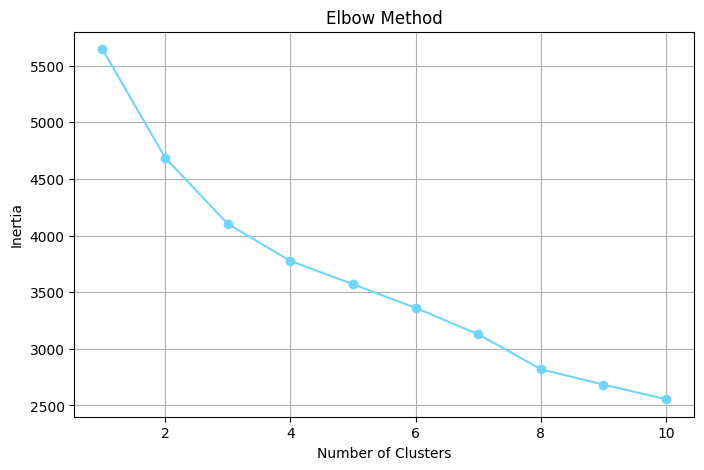

In [3]:
# Liczymy bezwładność klastrów (sumę kwadratów odległości od centroidów)
inertias = calculate_inertias(data_scaled)

# Szukamy "łokcia" na wykresie
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker="o", color=color_palette[0])
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)

/tmp/ipykernel_64825/1755797035.py:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


Text(0.5, 1.0, 'Metoda k-średnich z wizualizacją PCA')

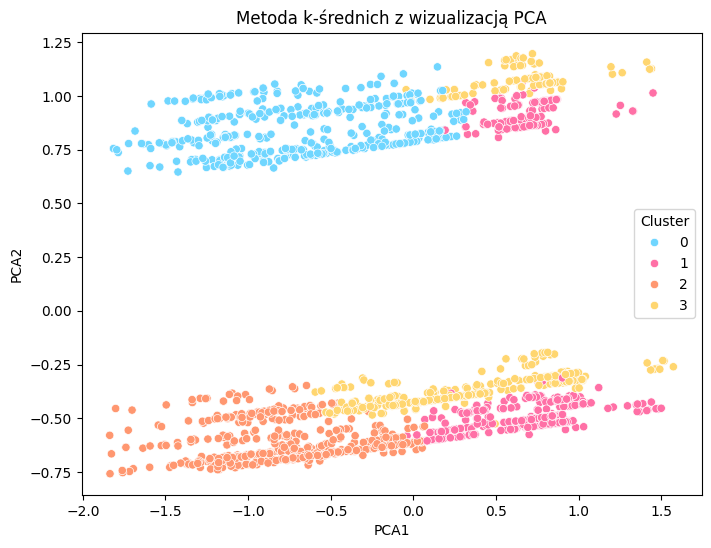

In [4]:
# Stosujemy metodę k-średnich dla wybranej liczby klastrów
optimal_k = 4

# Używamy random_state = 42, aby zapewnić, że klastry będą takie same z każdym uruchomieniem
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_scaled["Cluster"] = kmeans.fit_predict(data_scaled)

# Dwuwymiarowa wizualizacja danych za pomocą analizy głównych składowych (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled.drop("Cluster", axis=1))
data_scaled["PCA1"] = pca_components[:, 0]
data_scaled["PCA2"] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_scaled, x="PCA1", y="PCA2", hue="Cluster", palette=color_palette
)
plt.title("Metoda k-średnich z wizualizacją PCA")

/home/milosz/Desktop/code/student-performance/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipykernel_64825/554386437.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster',


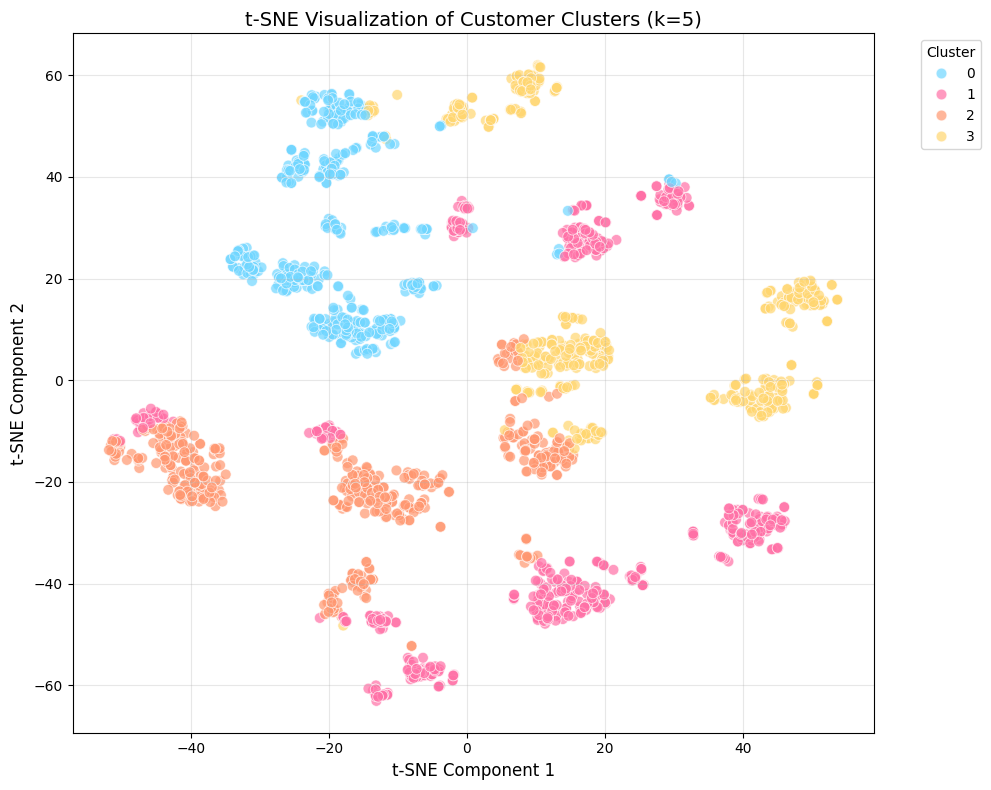

In [5]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_components = tsne.fit_transform(data_scaled.drop("Cluster", axis=1))

# Create a new dataframe for visualization
tsne_df = pd.DataFrame({'TSNE1': tsne_components[:, 0],
                        'TSNE2': tsne_components[:, 1],
                        'Cluster': data_scaled['Cluster']})

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', 
                palette=color_palette, alpha=0.7, s=60)
plt.title('t-SNE Visualization of Customer Clusters (k=5)', fontsize=14)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
#wariancja wyjaśniona przez PCA1 oraz PCA2
print("PCA1: ", round(pca.explained_variance_ratio_[0], 2))
print("PCA2: ", round(pca.explained_variance_ratio_[1], 2))
#część całkowitej wariancji danych jaką udało się przedstawić na wykresie
print("Suma wyjaśnionej wariancji: ", round(pca.explained_variance_ratio_.sum(), 2))

PCA1:  0.25
PCA2:  0.19
Suma wyjaśnionej wariancji:  0.44


In [6]:
# Wczytujemy nieustandaryzowane dane
original_data = read_preprocessed_data(std=False, le=False)

# Kopiujemy kolumnę "Cluster"
original_data["Cluster"] = data_scaled["Cluster"]

# Obliczamy średnie dla danych numerycznych i grupujemy dane według klastrów
cluster_summary = original_data.groupby("Cluster").mean(numeric_only=True)

# Obliczamy mediany dla danych kategorycznych
object_cols = original_data.select_dtypes(include="object").columns
for col in object_cols:
    mode_per_cluster = original_data.groupby("Cluster")[col].agg(lambda x: x.mode()[0])
    cluster_summary[col + "_mode"] = mode_per_cluster

# Zliczamy ilość danych w klastrze
cluster_summary["Count"] = original_data["Cluster"].value_counts().sort_index()

# Podsumowanie klastrów
cluster_summary.transpose()

c:\dadada4\Mad\customer-profile-analysis\data/marketing_campaign.csv


Cluster,0,1,2,3
Income,62221.058411,32901.148026,69423.537678,44759.763636
Kidhome,0.03972,0.879934,0.038697,0.634343
Teenhome,0.471963,0.394737,0.456212,0.674747
Recency,50.03972,50.509868,47.615071,47.462626
MntWines,456.025701,41.014803,524.586558,175.850505
MntFruits,41.503989,6.782895,53.833701,7.218182
MntMeatProducts,260.945529,25.787829,334.772978,53.4
MntFishProducts,60.241112,9.222039,79.258806,10.024242
MntSweetProducts,41.333879,6.697368,56.582618,7.133333
MntGoldProds,60.195155,18.179276,75.655191,20.646465


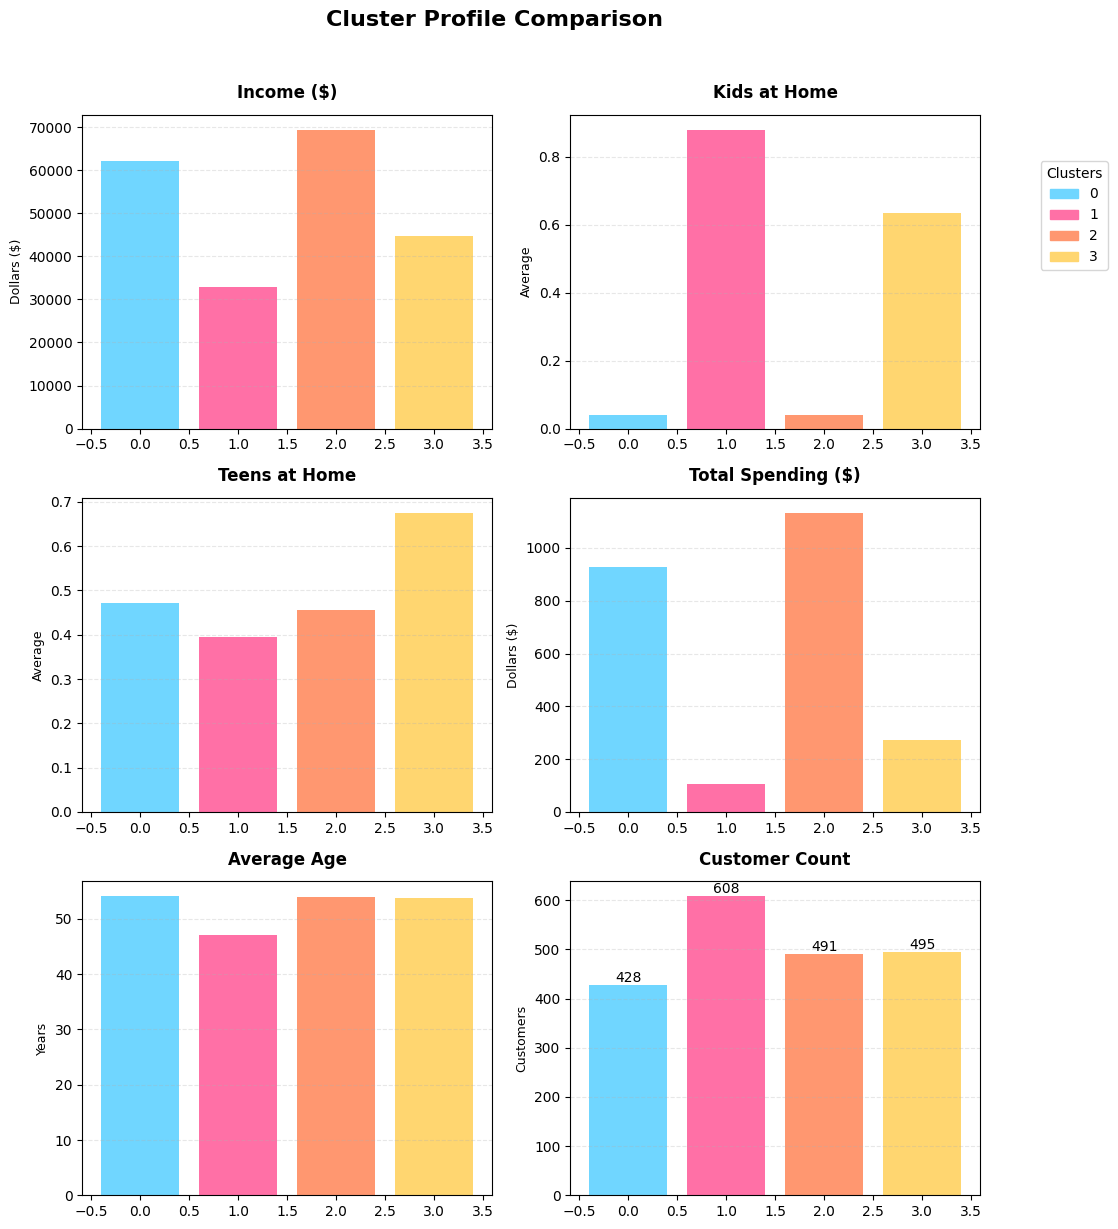

In [6]:
# Data preparation
variables = ['Income', 'Kidhome', 'Teenhome', 'Spent', 'Age', 'Count']
titles = ['Income ($)', 'Kids at Home', 'Teens at Home', 'Total Spending ($)', 'Average Age', 'Customer Count']
cluster_labels = cluster_summary.index

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Cluster Profile Comparison', fontsize=16, y=1.02, weight='bold')

# Plot each variable
for ax, var, title in zip(axes.flatten(), variables, titles):
    values = cluster_summary[var]
    
    bars = ax.bar(cluster_labels, values, color=color_palette)
    ax.set_title(title, pad=12, weight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add value labels for Count
    if var == 'Count':
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=10)
    
    # Format y-axis for monetary values
    if var in ['Income', 'Spent']:
        ax.set_ylabel('Dollars ($)', fontsize=9)
    elif var == 'Age':
        ax.set_ylabel('Years', fontsize=9)
    elif var == 'Count':
        ax.set_ylabel('Customers', fontsize=9)
    else:
        ax.set_ylabel('Average', fontsize=9)

plt.tight_layout()

# Add legend once
handles = [plt.Rectangle((0,0),1,1, color=color) 
           for color in color_palette]
fig.legend(handles, cluster_labels, 
           title='Clusters', 
           loc='upper right', 
           bbox_to_anchor=(1.12, 0.9))

plt.show()